# correct

## vgg 16(i)

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 67 bytes


In [ ]:
!kaggle datasets download -d arjuntejaswi/plant-village

plant-village.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import tensorflow as tf
from zipfile import ZipFile
import os,glob
import cv2
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten

<ipython-input-3-4addd0ae159c>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook as tqdm


In [ ]:
from zipfile import ZipFile
file_name = "/content/plant-village.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
os.chdir('/content/PlantVillage/Potato___Early_blight')
X = []
y = []
for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      try:
        img = cv2.resize(img,(224,224))
      except:
        continue
      X.append(img)
      '''y.append((i[0:1]))
      print(i[0:1])'''
      y.append('Early')
      #print(i[0:1])
os.chdir('/content/PlantVillage/Potato___Late_blight')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      img = cv2.resize(img,(224,224))
      X.append(img)
#for i in range(1,99):
      y.append('Late')
os.chdir('/content/PlantVillage/Potato___healthy')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      img = cv2.resize(img,(224,224))
      X.append(img)
      y.append('Healthy')
print(y)

  0%|          | 0/1001 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/152 [00:00<?, ?it/s]

['Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 

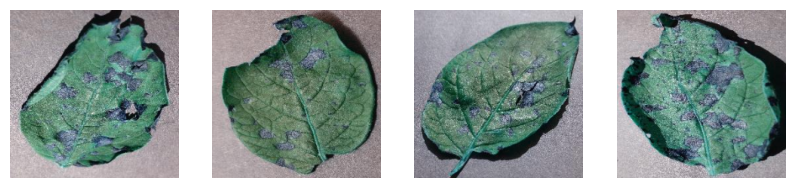

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X[i], cmap="gray")
    plt.axis('off')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print ("Shape of an image in X_train: ", X_train[0].shape)
print ("Shape of an image in X_test: ", X_test[0].shape)

Shape of an image in X_train:  (224, 224, 3)
Shape of an image in X_test:  (224, 224, 3)


In [ ]:
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)
y_train = np.array(y_train)
X_train = np.array(X_train)
y_test = np.array(y_test)
X_test = np.array(X_test)

In [ ]:
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

X_train Shape:  (2448, 224, 224, 3)
X_test Shape:  (613, 224, 224, 3)
y_train Shape:  (2448, 3)
y_test Shape:  (613, 3)


In [ ]:
from keras.applications import vgg16


img_rows, img_cols = 224, 224


vgg = vgg16.VGG16(weights = 'imagenet',
                 include_top = False,
                 input_shape = (img_rows, img_cols, 3))

# Here we freeze the last 4 layers
# Layers are set to trainable as True by default
for layer in vgg.layers:
    layer.trainable = False

# Let's print our layers
for (i,layer) in enumerate(vgg.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)

58889256/58889256 [==============================] - 0s 0us/step
0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False


In [ ]:
num_classes = 3
def lw(bottom_model, num_classes):
    """creates the top or head of the model that will be
    placed ontop of the bottom layers"""

    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(512,activation='relu')(top_model)
    top_model = Dense(num_classes,activation='softmax')(top_model)
    return top_model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

from keras.models import Model


num_classes = 3

FC_Head = lw(vgg, num_classes)

model = Model(inputs = vgg.input, outputs = FC_Head)

print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from tensorflow.keras.models import Model
model.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,
                    epochs=1,
                    validation_data=(X_test,y_test),
                    verbose = 1,
                    initial_epoch=0)

77/77 [==============================] - 1601s 21s/step - loss: 0.0275 - accuracy: 0.9902 - val_loss: 0.0234 - val_accuracy: 0.9902


#### .

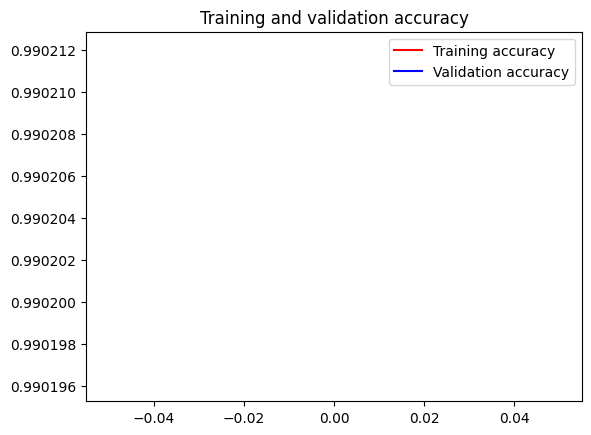

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

#### ..

In [ ]:
print(acc)
print(val_acc)
print(loss)
print(val_loss)

[0.9901960492134094]
[0.990212082862854]
[0.027499716728925705]
[0.023358585312962532]


In [ ]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

## MobileNetv2

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from sklearn.model_selection import train_test_split
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import os
import cv2
import numpy as np

# Load MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers
for layer in base_model.layers:
    layer.trainable = False

# Function to create the top (head) of the model
def create_top_model(bottom_model, num_classes):
    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1024, activation='relu')(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dense(num_classes, activation='softmax')(top_model)
    return top_model

# Number of classes
num_classes = 3

# Create the top model
FC_Head = create_top_model(base_model, num_classes)

# Create the new model
model = tf.keras.models.Model(inputs=base_model.input, outputs=FC_Head)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Extract and preprocess images
X = []
y = []

for class_name in ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']:
    class_path = f'/content/PlantVillage/{class_name}'
    for img_name in tqdm(os.listdir(class_path)):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        try:
          img = cv2.resize(img, (224, 224))
        except:
          continue
        img = img_to_array(img)
        img = np.expand_dims(img, 0)
        img = tf.keras.applications.mobilenet_v2.preprocess_input(img)
        X.append(img)
        y.append(class_name)

# Stack and shuffle the data
X = np.vstack(X)
y = np.array(y)




  0%|          | 0/1001 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/152 [00:00<?, ?it/s]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print ("Shape of an image in X_train: ", X_train[0].shape)
print ("Shape of an image in X_test: ", X_test[0].shape)

Shape of an image in X_train:  (224, 224, 3)
Shape of an image in X_test:  (224, 224, 3)


In [ ]:
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)
y_train = np.array(y_train)
X_train = np.array(X_train)
y_test = np.array(y_test)
X_test = np.array(X_test)

In [ ]:
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

X_train Shape:  (1721, 224, 224, 3)
X_test Shape:  (431, 224, 224, 3)
y_train Shape:  (1721, 3)
y_test Shape:  (431, 3)


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test), verbose=1)

Epoch 1/3
54/54 [==============================] - 78s 1s/step - loss: 0.1016 - accuracy: 0.9570 - val_loss: 0.2095 - val_accuracy: 0.9281
Epoch 2/3
54/54 [==============================] - 80s 1s/step - loss: 0.0537 - accuracy: 0.9797 - val_loss: 0.2424 - val_accuracy: 0.9095
Epoch 3/3
54/54 [==============================] - 77s 1s/step - loss: 0.0450 - accuracy: 0.9855 - val_loss: 0.1176 - val_accuracy: 0.9606


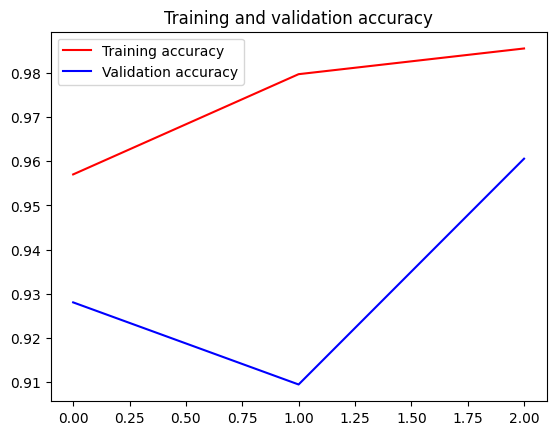

In [ ]:
# Plot training history
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

## ResNet152V2

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from sklearn.model_selection import train_test_split
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load ResNet152V2 model
base_model = ResNet152V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers
for layer in base_model.layers:
    layer.trainable = False

# Function to create the top (head) of the model
def create_top_model(bottom_model, num_classes):
    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1024, activation='relu')(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dense(num_classes, activation='softmax')(top_model)
    return top_model

# Number of classes
num_classes = 3

# Create the top model
FC_Head = create_top_model(base_model, num_classes)

# Create the new model
model = tf.keras.models.Model(inputs=base_model.input, outputs=FC_Head)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Extract and preprocess images
X = []
y = []

label_encoder = LabelEncoder()

for class_name in ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']:
    class_path = f'/content/PlantVillage/{class_name}'
    for img_name in tqdm(os.listdir(class_path)):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        try:
          img = cv2.resize(img, (224, 224))
        except:
          continue
        img = img_to_array(img)
        img = np.expand_dims(img, 0)
        img = tf.keras.applications.resnet_v2.preprocess_input(img)  # Use resnet_v2 preprocess_input
        X.append(img)
        y.append(class_name)

# Stack and shuffle the data
X = np.vstack(X)
y = np.array(y)


234545216/234545216 [==============================] - 2s 0us/step


  0%|          | 0/1001 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/152 [00:00<?, ?it/s]

In [ ]:

# Encode labels using LabelEncoder
y_encoded = label_encoder.fit_transform(y)

# Convert labels to one-hot encoding
y_one_hot = tf.keras.utils.to_categorical(y_encoded, num_classes=num_classes)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Train the model
history = model.fit(X_train, y_train, epochs=2, validation_data=(X_test, y_test), verbose=1)



Epoch 1/2
54/54 [==============================] - 914s 17s/step - loss: 0.4937 - accuracy: 0.8617 - val_loss: 0.1894 - val_accuracy: 0.9397
Epoch 2/2
54/54 [==============================] - 907s 17s/step - loss: 0.1046 - accuracy: 0.9628 - val_loss: 0.0870 - val_accuracy: 0.9698


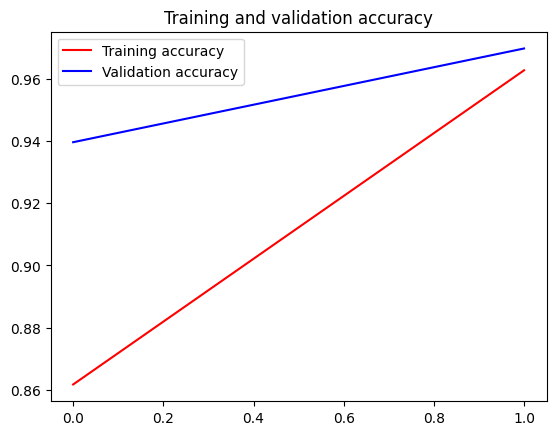

In [ ]:
# Plot training history
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

## Inception V3

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from sklearn.model_selection import train_test_split
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers
for layer in base_model.layers:
    layer.trainable = False

# Function to create the top (head) of the model
def create_top_model(bottom_model, num_classes):
    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1024, activation='relu')(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dense(num_classes, activation='softmax')(top_model)
    return top_model

# Number of classes
num_classes = 3

# Create the top model
FC_Head = create_top_model(base_model, num_classes)

# Create the new model
model = tf.keras.models.Model(inputs=base_model.input, outputs=FC_Head)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Extract and preprocess images
X = []
y = []

label_encoder = LabelEncoder()

for class_name in ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']:
    class_path = f'/content/PlantVillage/{class_name}'
    for img_name in tqdm(os.listdir(class_path)):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        try:
          img = cv2.resize(img, (224, 224))
        except:
          continue
        img = img_to_array(img)
        img = np.expand_dims(img, 0)
        img = tf.keras.applications.inception_v3.preprocess_input(img)  # Use inception_v3 preprocess_input
        X.append(img)
        y.append(class_name)

# Stack and shuffle the data
X = np.vstack(X)
y = np.array(y)

87910968/87910968 [==============================] - 1s 0us/step


  0%|          | 0/1001 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/152 [00:00<?, ?it/s]

In [ ]:
# Encode labels using LabelEncoder
y_encoded = label_encoder.fit_transform(y)

# Convert labels to one-hot encoding
y_one_hot = tf.keras.utils.to_categorical(y_encoded, num_classes=num_classes)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Train the model
history = model.fit(X_train, y_train, epochs=2, validation_data=(X_test, y_test), verbose=1)

Epoch 1/2
54/54 [==============================] - 256s 5s/step - loss: 0.5339 - accuracy: 0.7792 - val_loss: 0.4093 - val_accuracy: 0.8213
Epoch 2/2
54/54 [==============================] - 254s 5s/step - loss: 0.2699 - accuracy: 0.8960 - val_loss: 0.2532 - val_accuracy: 0.9002


In [ ]:
# Plot training history
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

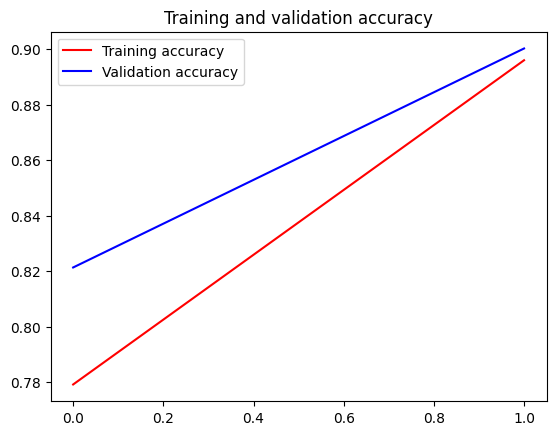

In [ ]:
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

## VGG16

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 67 bytes


In [ ]:
!kaggle datasets download -d arjuntejaswi/plant-village

 96% 316M/329M [00:01<00:00, 192MB/s]
100% 329M/329M [00:01<00:00, 218MB/s]


In [ ]:
import tensorflow as tf
from zipfile import ZipFile
import os,glob
import cv2
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten

In [ ]:
from zipfile import ZipFile
file_name = "/content/plant-village.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
os.chdir('/content/PlantVillage/Potato___Early_blight')
X = []
y = []
for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      try:
        img = cv2.resize(img,(224,224))
      except:
        continue
      X.append(img)
      '''y.append((i[0:1]))
      print(i[0:1])'''
      y.append('Early')
      #print(i[0:1])
os.chdir('/content/PlantVillage/Potato___Late_blight')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      img = cv2.resize(img,(224,224))
      X.append(img)
#for i in range(1,99):
      y.append('Late')
os.chdir('/content/PlantVillage/Potato___healthy')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      img = cv2.resize(img,(224,224))
      X.append(img)
      y.append('Healthy')
print(y)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/152 [00:00<?, ?it/s]

['Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 'Early', 

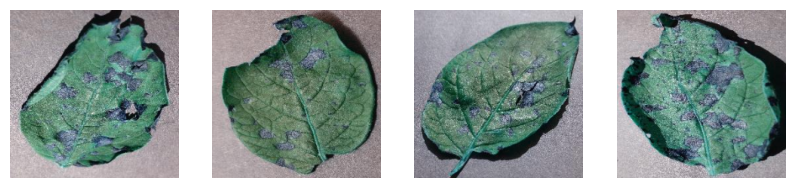

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X[i], cmap="gray")
    plt.axis('off')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print ("Shape of an image in X_train: ", X_train[0].shape)
print ("Shape of an image in X_test: ", X_test[0].shape)

Shape of an image in X_train:  (224, 224, 3)
Shape of an image in X_test:  (224, 224, 3)


In [ ]:
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)
y_train = np.array(y_train)
X_train = np.array(X_train)
y_test = np.array(y_test)
X_test = np.array(X_test)

In [ ]:
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

X_train Shape:  (1721, 224, 224, 3)
X_test Shape:  (431, 224, 224, 3)
y_train Shape:  (1721, 3)
y_test Shape:  (431, 3)


In [ ]:
from keras.applications import vgg16


img_rows, img_cols = 224, 224


vgg = vgg16.VGG16(weights = 'imagenet',
                 include_top = False,
                 input_shape = (img_rows, img_cols, 3))

# Here we freeze the last 4 layers
# Layers are set to trainable as True by default
for layer in vgg.layers:
    layer.trainable = False

# Let's print our layers
for (i,layer) in enumerate(vgg.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)

58889256/58889256 [==============================] - 0s 0us/step
0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False


In [ ]:
num_classes = 3
def lw(bottom_model, num_classes):
    """creates the top or head of the model that will be
    placed ontop of the bottom layers"""

    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(512,activation='relu')(top_model)
    top_model = Dense(num_classes,activation='softmax')(top_model)
    return top_model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

from keras.models import Model


num_classes = 3

FC_Head = lw(vgg, num_classes)

model = Model(inputs = vgg.input, outputs = FC_Head)

print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from tensorflow.keras.models import Model
model.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,
                    epochs=2,
                    validation_data=(X_test,y_test),
                    verbose = 1,
                    initial_epoch=0)

Epoch 1/2
54/54 [==============================] - 1337s 25s/step - loss: 0.7979 - accuracy: 0.8635 - val_loss: 0.0967 - val_accuracy: 0.9675
Epoch 2/2
54/54 [==============================] - 1254s 23s/step - loss: 0.0712 - accuracy: 0.9773 - val_loss: 0.1345 - val_accuracy: 0.9606


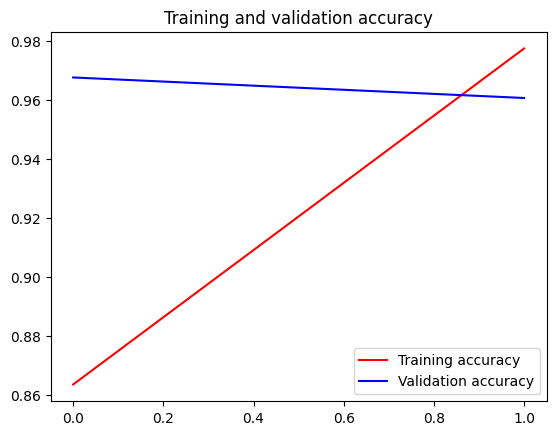

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
print(acc)
print(val_acc)
print(loss)
print(val_loss)

[0.8634514808654785, 0.9773387312889099]
[0.9675173759460449, 0.9605568647384644]
[0.7978683710098267, 0.07117778062820435]
[0.09665628522634506, 0.13453570008277893]


In [ ]:
plt.figure(figsize=(10, 6))

## DenseNet121

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from sklearn.model_selection import train_test_split
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load DenseNet121 model
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers
for layer in base_model.layers:
    layer.trainable = False

# Function to create the top (head) of the model
def create_top_model(bottom_model, num_classes):
    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1024, activation='relu')(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dense(num_classes, activation='softmax')(top_model)
    return top_model

# Number of classes
num_classes = 3

# Create the top model
FC_Head = create_top_model(base_model, num_classes)

# Create the new model
model = tf.keras.models.Model(inputs=base_model.input, outputs=FC_Head)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Extract and preprocess images
X = []
y = []

label_encoder = LabelEncoder()

for class_name in ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']:
    class_path = f'/content/PlantVillage/{class_name}'
    for img_name in tqdm(os.listdir(class_path)):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        try:
          img = cv2.resize(img, (224, 224))
        except:
          continue
        img = img_to_array(img)
        img = np.expand_dims(img, 0)
        img = tf.keras.applications.densenet.preprocess_input(img)  # Use densenet preprocess_input
        X.append(img)
        y.append(class_name)

# Stack and shuffle the data
X = np.vstack(X)
y = np.array(y)

29084464/29084464 [==============================] - 0s 0us/step


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/152 [00:00<?, ?it/s]

In [ ]:
# Encode labels using LabelEncoder
y_encoded = label_encoder.fit_transform(y)

# Convert labels to one-hot encoding
y_one_hot = tf.keras.utils.to_categorical(y_encoded, num_classes=num_classes)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=1, reset_metrics=False)


TypeError: ignored

In [ ]:
# Plot training history
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from sklearn.model_selection import train_test_split
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load DenseNet121 model
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers
for layer in base_model.layers:
    layer.trainable = False

# Function to create the top (head) of the model
def create_top_model(bottom_model, num_classes):
    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1024, activation='relu')(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dense(num_classes, activation='softmax')(top_model)
    return top_model

# Number of classes
num_classes = 3

# Create the top model
FC_Head = create_top_model(base_model, num_classes)

# Create the new model
model = tf.keras.models.Model(inputs=base_model.input, outputs=FC_Head)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Extract and preprocess images
X = []
y = []

label_encoder = LabelEncoder()

for class_name in ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']:
    class_path = f'/content/PlantVillage/{class_name}'
    for img_name in tqdm(os.listdir(class_path)):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        try:
          img = cv2.resize(img, (224, 224))
        except:
          continue
        img = img_to_array(img)
        img = np.expand_dims(img, 0)
        img = tf.keras.applications.densenet.preprocess_input(img)  # Use densenet preprocess_input
        X.append(img)
        y.append(class_name)

# Stack and shuffle the data
X = np.vstack(X)
y = np.array(y)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/152 [00:00<?, ?it/s]

In [ ]:
# Encode labels using LabelEncoder
y_encoded = label_encoder.fit_transform(y)

# Convert labels to one-hot encoding
y_one_hot = tf.keras.utils.to_categorical(y_encoded, num_classes=num_classes)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)


In [ ]:
# Define the training loop with tf.function
@tf.function
def train_step(inputs, labels):
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True)
        loss = tf.keras.losses.categorical_crossentropy(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss

# Training loop
epochs = 10
batch_size = 32

for epoch in range(epochs):
    for i in range(0, len(X_train), batch_size):
        batch_X = X_train[i:i+batch_size]
        batch_y = y_train[i:i+batch_size]
        loss = train_step(batch_X, batch_y)

    # Validation step
    val_predictions = model(X_test, training=False)
    val_loss = tf.keras.losses.categorical_crossentropy(y_test, val_predictions)

    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.numpy()}, Validation Loss: {val_loss.numpy()}")

NameError: ignored

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from sklearn.model_selection import train_test_split
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load DenseNet121 model
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers
for layer in base_model.layers:
    layer.trainable = False

# Function to create the top (head) of the model
def create_top_model(bottom_model, num_classes):
    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1024, activation='relu')(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dense(num_classes, activation='softmax')(top_model)
    return top_model

# Number of classes
num_classes = 3

# Create the top model
FC_Head = create_top_model(base_model, num_classes)

# Create the new model
model = tf.keras.models.Model(inputs=base_model.input, outputs=FC_Head)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Extract and preprocess images
X = []
y = []

label_encoder = LabelEncoder()

for class_name in ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']:
    class_path = f'/content/PlantVillage/{class_name}'
    for img_name in tqdm(os.listdir(class_path)):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        try:
          img = cv2.resize(img, (224, 224))
        except:
          continue
        img = img_to_array(img)
        img = np.expand_dims(img, 0)
        img = tf.keras.applications.densenet.preprocess_input(img)  # Use densenet preprocess_input
        X.append(img)
        y.append(class_name)



  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/152 [00:00<?, ?it/s]

In [ ]:
import builtins

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from sklearn.model_selection import train_test_split
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load DenseNet121 model
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers
for layer in base_model.layers:
    layer.trainable = False

# Function to create the top (head) of the model
def create_top_model(bottom_model, num_classes):
    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1024, activation='relu')(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dense(num_classes, activation='softmax')(top_model)
    return top_model

# Number of classes
num_classes = 3

# Create the top model
FC_Head = create_top_model(base_model, num_classes)

# Create the new model
model = tf.keras.models.Model(inputs=base_model.input, outputs=FC_Head)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Extract and preprocess images
X = []
y = []

label_encoder = LabelEncoder()

for class_name in ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']:
    class_path = f'/content/PlantVillage/{class_name}'
    for img_name in tqdm(os.listdir(class_path)):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        try:
          img = cv2.resize(img, (224, 224))
        except:
          continue
        # Remove unnecessary dimension
        img = np.squeeze(img)

        img = img_to_array(img)
        img = np.expand_dims(img, 0)
        img = tf.keras.applications.densenet.preprocess_input(img)

        X.append(img)
        y.append(class_name)

# Stack the data
X = np.vstack(X)

# Encode labels using LabelEncoder
y_encoded = label_encoder.fit_transform(y)

# Convert labels to one-hot encoding
y_one_hot = tf.keras.utils.to_categorical(y_encoded, num_classes=num_classes)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Define the training loop with tf.function
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Define your optimizer

@tf.function
def train_step(inputs, labels):
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True)
        loss = tf.keras.losses.categorical_crossentropy(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(builtins.zip(gradients, model.trainable_variables))
    return loss

# Training loop
epochs = 10
batch_size = 32

# Lists to store history
train_loss_history = []
val_loss_history = []
train_acc_history = []
val_acc_history = []

for epoch in range(epochs):
    for i in range(0, len(X_train), batch_size):
        batch_X = X_train[i:i+batch_size]
        batch_y = y_train[i:i+batch_size]
        loss = train_step(batch_X, batch_y)

    # Validation step
    val_predictions = model(X_test, training=False)
    val_loss = tf.keras.losses.categorical_crossentropy(y_test, val_predictions)

    # Calculate accuracy
    train_acc = np.mean(np.argmax(y_train, axis=1) == np.argmax(model(X_train, training=False).numpy(), axis=1))
    val_acc = np.mean(np.argmax(y_test, axis=1) == np.argmax(val_predictions.numpy(), axis=1))

    # Append to history lists
    train_loss_history.append(loss.numpy())
    val_loss_history.append(val_loss.numpy())
    train_acc_history.append(train_acc)
    val_acc_history.append(val_acc)

    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.numpy()}, Validation Loss: {val_loss.numpy()}, "
          f"Train Acc: {train_acc}, Validation Acc: {val_acc}")




  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/152 [00:00<?, ?it/s]

In [ ]:
# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_loss_history, label='Training Loss')
plt.plot(val_loss_history, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_acc_history, label='Training Accuracy')
plt.plot(val_acc_history, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## EfficientNetB0

In [ ]:
pip install efficientnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 1.2 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from sklearn.model_selection import train_test_split
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from efficientnet.tfkeras import EfficientNetB0

# Load EfficientNetB0 model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers
for layer in base_model.layers:
    layer.trainable = False

# Function to create the top (head) of the model
def create_top_model(bottom_model, num_classes):
    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1024, activation='relu')(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dense(num_classes, activation='softmax')(top_model)
    return top_model

# Number of classes
num_classes = 3

# Create the top model
FC_Head = create_top_model(base_model, num_classes)

# Create the new model
model = tf.keras.models.Model(inputs=base_model.input, outputs=FC_Head)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Extract and preprocess images
X = []
y = []

label_encoder = LabelEncoder()

for class_name in ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']:
    class_path = f'/content/PlantVillage/{class_name}'
    for img_name in tqdm(os.listdir(class_path)):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        try:
          img = cv2.resize(img, (224, 224))
        except:
          continue
        img = np.expand_dims(img, 0)
        img = EfficientNetB0.preprocess_input(np.float32(img))  # Use EfficientNetB0 preprocessing
        X.append(img)
        y.append(class_name)



16804768/16804768 [==============================] - 0s 0us/step


  0%|          | 0/1000 [00:00<?, ?it/s]

AttributeError: ignored

In [ ]:
# Stack and shuffle the data
X = np.vstack(X)
y = np.array(y)

# Encode labels using LabelEncoder
y_encoded = label_encoder.fit_transform(y)

# Convert labels to one-hot encoding
y_one_hot = tf.keras.utils.to_categorical(y_encoded, num_classes=num_classes)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Train the model
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), verbose=1)

In [ ]:
# Plot training history
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()